In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import KFold, cross_val_score,train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [3]:
record = pd.read_csv('application_record.csv')

In [4]:
record.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [5]:
record.shape

(438557, 18)

In [6]:
record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [7]:
record['ID'].duplicated().sum()

47

In [8]:
record = record.drop_duplicates(subset='ID',keep='first')

In [9]:
record.shape

(438510, 18)

In [10]:
record.columns[1:]

Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],
      dtype='object')

In [11]:
record.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134193
CNT_FAM_MEMBERS             0
dtype: int64

In [12]:
record['NAME_INCOME_TYPE'].unique()

array(['Working', 'Commercial associate', 'Pensioner', 'State servant',
       'Student'], dtype=object)

In [13]:
record['NAME_EDUCATION_TYPE'].unique()

array(['Higher education', 'Secondary / secondary special',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

In [14]:
record['NAME_FAMILY_STATUS'].unique()

array(['Civil marriage', 'Married', 'Single / not married', 'Separated',
       'Widow'], dtype=object)

In [15]:
record['NAME_HOUSING_TYPE'].unique()

array(['Rented apartment', 'House / apartment', 'Municipal apartment',
       'With parents', 'Co-op apartment', 'Office apartment'],
      dtype=object)

In [16]:
record['FLAG_MOBIL'].value_counts()

FLAG_MOBIL
1    438510
Name: count, dtype: int64

In [17]:
record['FLAG_WORK_PHONE'].unique()

array([1, 0], dtype=int64)

In [18]:
record['FLAG_PHONE'].unique()

array([0, 1], dtype=int64)

In [19]:
record['FLAG_EMAIL'].unique()

array([0, 1], dtype=int64)

In [20]:
record['OCCUPATION_TYPE'].value_counts(dropna=False)

OCCUPATION_TYPE
NaN                      134193
Laborers                  78231
Core staff                43000
Sales staff               41094
Managers                  35481
Drivers                   26090
High skill tech staff     17285
Accountants               15983
Medicine staff            13518
Cooking staff              8076
Security staff             7993
Cleaning staff             5843
Private service staff      3455
Low-skill Laborers         2140
Secretaries                2044
Waiters/barmen staff       1665
Realty agents              1041
HR staff                    774
IT staff                    604
Name: count, dtype: int64

In [21]:
record['OCCUPATION_TYPE'].fillna('not_specified',inplace=True)

In [22]:
record['OCCUPATION_TYPE'].value_counts(dropna=False)

OCCUPATION_TYPE
not_specified            134193
Laborers                  78231
Core staff                43000
Sales staff               41094
Managers                  35481
Drivers                   26090
High skill tech staff     17285
Accountants               15983
Medicine staff            13518
Cooking staff              8076
Security staff             7993
Cleaning staff             5843
Private service staff      3455
Low-skill Laborers         2140
Secretaries                2044
Waiters/barmen staff       1665
Realty agents              1041
HR staff                    774
IT staff                    604
Name: count, dtype: int64

In [23]:
record.describe(percentiles=[.01,.02,.03,.04,.05,.1,.25,.5,.75,.9,.95,.96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
ID,438510.0,6.022035e+06,571496.239776,5008804.0,5024429.09,5041533.18,5054216.27,5068686.36,5091807.45,5181098.9,5609362.25,6047719.50,6454160.75,6722537.1,6800362.55,6830288.64,7009897.1,7271099.44,7636888.19,7999952.0
CNT_CHILDREN,438510.0,4.273814e-01,0.724874,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,1.00,2.0,2.00,2.00,2.0,2.00,3.00,19.0
AMT_INCOME_TOTAL,438510.0,1.875254e+05,110089.279583,26100.0,54000.00,67500.00,67500.00,72000.00,76500.00,90000.0,121500.00,160940.25,225000.00,315000.0,360000.00,382500.00,405000.0,450000.00,540000.00,6750000.0
DAYS_BIRTH,438510.0,-1.599802e+04,4185.016222,-25201.0,-24013.00,-23642.00,-23413.00,-23181.00,-22972.00,-21982.0,-19484.00,-15630.00,-12514.00,-10519.0,-9889.00,-9655.00,-9343.0,-9011.00,-8575.00,-7489.0
DAYS_EMPLOYED,438510.0,6.056619e+04,138770.072835,-17531.0,-10913.00,-9533.00,-8486.00,-7792.00,-7205.00,-5295.0,-3103.00,-1467.00,-371.00,365243.0,365243.00,365243.00,365243.0,365243.00,365243.00,365243.0
FLAG_MOBIL,438510.0,1.000000e+00,0.000000,1.0,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.0,1.00,1.00,1.0,1.00,1.00,1.0
FLAG_WORK_PHONE,438510.0,2.061276e-01,0.404524,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,1.0,1.00,1.00,1.0,1.00,1.00,1.0
FLAG_PHONE,438510.0,2.877699e-01,0.452724,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,1.00,1.0,1.00,1.00,1.0,1.00,1.00,1.0
FLAG_EMAIL,438510.0,1.082005e-01,0.310634,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,1.0,1.00,1.00,1.0,1.00,1.00,1.0
CNT_FAM_MEMBERS,438510.0,2.194463e+00,0.897192,1.0,1.00,1.00,1.00,1.00,1.00,1.0,2.00,2.00,3.00,3.0,4.00,4.00,4.0,4.00,5.00,20.0


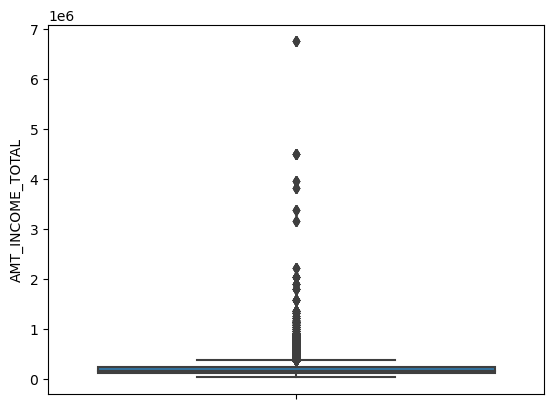

In [24]:
sns.boxplot(record, y='AMT_INCOME_TOTAL')

plt.show()

<Axes: ylabel='CNT_CHILDREN'>

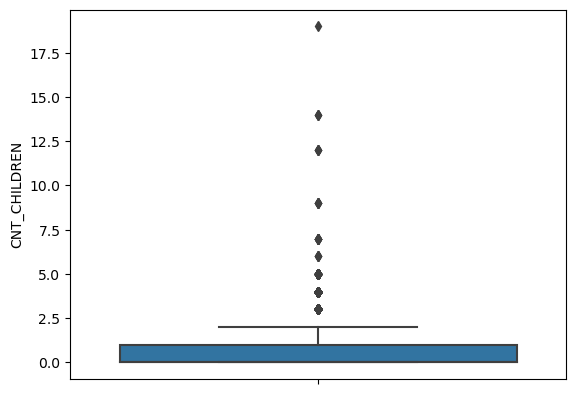

In [25]:
sns.boxplot(data=record, y=record['CNT_CHILDREN'])

In [26]:
record['DAYS_EMPLOYED'].max()

365243

<Axes: ylabel='DAYS_BIRTH'>

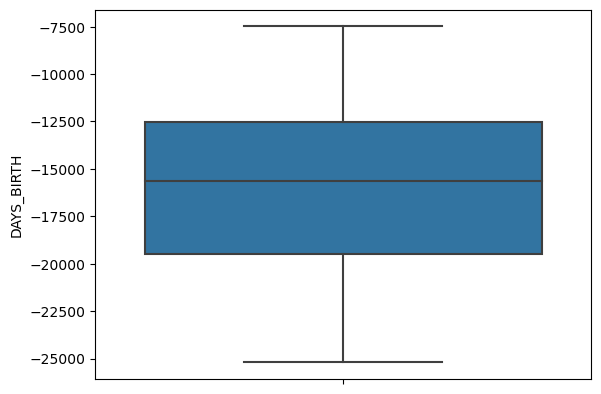

In [27]:
sns.boxplot(data=record, y=record['DAYS_BIRTH'])

<Axes: ylabel='DAYS_EMPLOYED'>

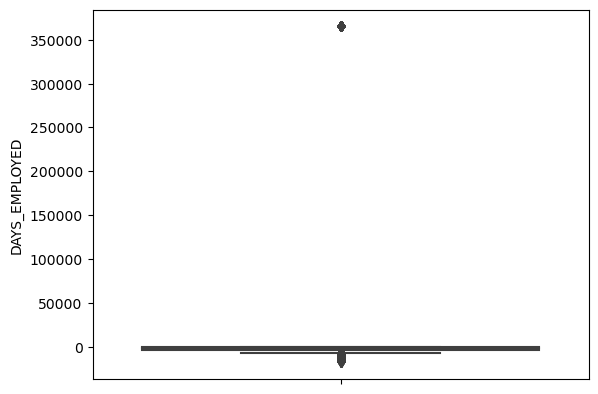

In [28]:
sns.boxplot(data=record, y=record['DAYS_EMPLOYED'])

In [29]:
record[record['DAYS_EMPLOYED']>=0]['DAYS_EMPLOYED'].value_counts()

DAYS_EMPLOYED
365243    75324
Name: count, dtype: int64

In [30]:
record['DAYS_EMPLOYED'].replace(365243,0,inplace=True)

In [31]:
record[record['DAYS_EMPLOYED']>=0]['DAYS_EMPLOYED'].value_counts()

DAYS_EMPLOYED
0    75324
Name: count, dtype: int64

In [32]:
record['AGE_YEARS']=round(-record['DAYS_BIRTH']/365.2425,0)

In [33]:
record['YEARS_EMPLOYED']=round(-record['DAYS_EMPLOYED']/365.2425)
record.loc[record['YEARS_EMPLOYED']<0,'YEARS_EMPLOYED']=0

In [34]:
record.drop(columns=["DAYS_BIRTH","DAYS_EMPLOYED"],inplace=True)

In [35]:
record.describe(percentiles=[.01,.02,.03,.04,.05,.1,.25,.5,.75,.9,.95,.96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
ID,438510.0,6.022035e+06,571496.239776,5008804.0,5024429.09,5041533.18,5054216.27,5068686.36,5091807.45,5181098.9,5609362.25,6047719.50,6454160.75,6722537.1,6800362.55,6830288.64,7009897.1,7271099.44,7636888.19,7999952.0
CNT_CHILDREN,438510.0,4.273814e-01,0.724874,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,1.00,2.0,2.00,2.00,2.0,2.00,3.00,19.0
AMT_INCOME_TOTAL,438510.0,1.875254e+05,110089.279583,26100.0,54000.00,67500.00,67500.00,72000.00,76500.00,90000.0,121500.00,160940.25,225000.00,315000.0,360000.00,382500.00,405000.0,450000.00,540000.00,6750000.0
FLAG_MOBIL,438510.0,1.000000e+00,0.000000,1.0,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.0,1.00,1.00,1.0,1.00,1.00,1.0
FLAG_WORK_PHONE,438510.0,2.061276e-01,0.404524,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,1.0,1.00,1.00,1.0,1.00,1.00,1.0
FLAG_PHONE,438510.0,2.877699e-01,0.452724,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,1.00,1.0,1.00,1.00,1.0,1.00,1.00,1.0
FLAG_EMAIL,438510.0,1.082005e-01,0.310634,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,1.0,1.00,1.00,1.0,1.00,1.00,1.0
CNT_FAM_MEMBERS,438510.0,2.194463e+00,0.897192,1.0,1.00,1.00,1.00,1.00,1.00,1.0,2.00,2.00,3.00,3.0,4.00,4.00,4.0,4.00,5.00,20.0
AGE_YEARS,438510.0,4.380453e+01,11.465521,21.0,23.00,25.00,26.00,26.00,27.00,29.0,34.00,43.00,53.00,60.0,63.00,63.00,64.0,65.00,66.00,69.0
YEARS_EMPLOYED,438510.0,5.956069e+00,6.574244,0.0,0.00,0.00,0.00,0.00,0.00,0.0,1.00,4.00,8.00,14.0,20.00,21.00,23.0,26.00,30.00,48.0


In [36]:
record['ID'].duplicated().sum()

0

<Axes: ylabel='AMT_INCOME_TOTAL'>

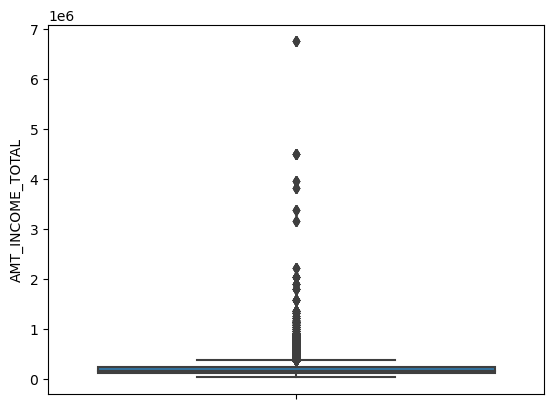

In [37]:
sns.boxplot(record,y='AMT_INCOME_TOTAL')

In [38]:
record[record['AMT_INCOME_TOTAL']>540000]

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE_YEARS,YEARS_EMPLOYED
267,5009092,M,Y,Y,1,765000.0,Working,Higher education,Married,House / apartment,1,1,0,0,Managers,3.0,33.0,3.0
268,5009094,M,Y,Y,1,765000.0,Working,Higher education,Married,House / apartment,1,1,0,0,Managers,3.0,33.0,3.0
269,5009095,M,Y,Y,1,765000.0,Working,Higher education,Married,House / apartment,1,1,0,0,Managers,3.0,33.0,3.0
270,6153741,M,Y,Y,1,765000.0,Working,Higher education,Married,House / apartment,1,1,0,0,Managers,3.0,33.0,3.0
492,5009359,F,Y,N,0,900000.0,Working,Higher education,Single / not married,House / apartment,1,0,0,0,Managers,1.0,52.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438095,6630576,F,Y,Y,1,675000.0,Pensioner,Higher education,Civil marriage,House / apartment,1,0,0,1,Managers,3.0,42.0,3.0
438255,6697842,M,N,Y,0,675000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,0,1,Managers,1.0,43.0,5.0
438294,6715605,M,Y,Y,3,585000.0,Commercial associate,Higher education,Married,House / apartment,1,0,1,0,Managers,5.0,40.0,8.0
438295,6715606,M,Y,Y,3,585000.0,Commercial associate,Higher education,Married,House / apartment,1,0,1,0,Managers,5.0,40.0,8.0


In [39]:
record.drop(columns=["FLAG_MOBIL"],inplace=True)

In [40]:
credit_record = pd.read_csv('credit_record.csv')

In [41]:
credit_record.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [42]:
credit_record.shape

(1048575, 3)

In [43]:
credit_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [44]:
credit_record.duplicated().sum()

0

In [45]:
credit_record['MONTHS_BALANCE'].unique()

array([  0,  -1,  -2,  -3,  -4,  -5,  -6,  -7,  -8,  -9, -10, -11, -12,
       -13, -14, -15, -16, -17, -18, -19, -20, -21, -22, -23, -24, -25,
       -26, -27, -28, -29, -30, -31, -32, -33, -34, -35, -36, -37, -38,
       -39, -40, -41, -42, -43, -44, -45, -46, -47, -48, -49, -50, -51,
       -52, -53, -54, -55, -56, -57, -58, -59, -60], dtype=int64)

In [46]:
credit_record['STATUS'].unique()

array(['X', '0', 'C', '1', '2', '3', '4', '5'], dtype=object)

In [47]:
credit_record[credit_record['STATUS'].isin(['X', 'C'])]

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
4,5001712,0,C
5,5001712,-1,C
6,5001712,-2,C
7,5001712,-3,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [48]:
credit_record['ID'].nunique()

45985

In [49]:
credit_record['target']=credit_record['STATUS']
credit_record['target'].replace('X', 0, inplace=True)
credit_record['target'].replace('C', 0, inplace=True)
credit_record['target']=credit_record['target'].astype(int)
credit_record.loc[credit_record['target']>=1,'target']=1

In [50]:
df3=pd.DataFrame(credit_record.groupby(['ID'])['target'].agg("max")).reset_index()

In [51]:
df3["target"].value_counts()

target
0    40635
1     5350
Name: count, dtype: int64

In [52]:
#Merging the two table using an inner join
df = pd.merge(record, df3, how='inner', on=['ID'])

In [53]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE_YEARS,YEARS_EMPLOYED,target
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,not_specified,2.0,33.0,12.0,1
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,not_specified,2.0,33.0,12.0,1
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,0,0,0,Security staff,2.0,59.0,3.0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,Sales staff,1.0,52.0,8.0,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,Sales staff,1.0,52.0,8.0,0


In [54]:
start_df = pd.DataFrame(credit_record.groupby(['ID'])['MONTHS_BALANCE'].agg(min)).reset_index()

start_df.rename(columns={'MONTHS_BALANCE': 'ACCOUNT_LENGTH'}, inplace=True)

start_df['ACCOUNT_LENGTH'] = -start_df['ACCOUNT_LENGTH']

In [55]:
start_df

,ID,ACCOUNT_LENGTH
0,5001711,3
1,5001712,18
2,5001713,21
3,5001714,14
4,5001715,59
...,...,...
45980,5150482,28
45981,5150483,17
45982,5150484,12
45983,5150485,1


In [56]:
df = pd.merge(df, start_df, how='inner', on=['ID'])

In [57]:
df.dtypes

ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
AGE_YEARS              float64
YEARS_EMPLOYED         float64
target                   int32
ACCOUNT_LENGTH           int64
dtype: object

In [58]:
df.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,AGE_YEARS,YEARS_EMPLOYED,target,ACCOUNT_LENGTH
count,3.645700e+04,36457.000000,3.645700e+04,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000
mean,5.078227e+06,0.430315,1.866857e+05,0.225526,0.294813,0.089722,2.198453,43.747017,6.036783,0.117700,26.164193
std,4.187524e+04,0.742367,1.017892e+05,0.417934,0.455965,0.285787,0.911686,11.514045,6.488058,0.322257,16.501854
min,5.008804e+06,0.000000,2.700000e+04,0.000000,0.000000,0.000000,1.000000,21.000000,0.000000,0.000000,0.000000
25%,5.042028e+06,0.000000,1.215000e+05,0.000000,0.000000,0.000000,2.000000,34.000000,1.000000,0.000000,12.000000
50%,5.074614e+06,0.000000,1.575000e+05,0.000000,0.000000,0.000000,2.000000,43.000000,4.000000,0.000000,24.000000
75%,5.115396e+06,1.000000,2.250000e+05,0.000000,1.000000,0.000000,3.000000,53.000000,9.000000,0.000000,39.000000
max,5.150487e+06,19.000000,1.575000e+06,1.000000,1.000000,1.000000,20.000000,69.000000,43.000000,1.000000,60.000000


In [59]:
df.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_WORK_PHONE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'AGE_YEARS', 'YEARS_EMPLOYED', 'target', 'ACCOUNT_LENGTH'],
      dtype='object')

In [60]:
df.dtypes

ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
AGE_YEARS              float64
YEARS_EMPLOYED         float64
target                   int32
ACCOUNT_LENGTH           int64
dtype: object

In [61]:

# Get numerical column names
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical Columns:")
print(num_cols)

# Get categorical column names
cat_cols = df.select_dtypes(include=['object']).columns
print("\nCategorical Columns:")
print(cat_cols)

Numerical Columns:
Index(['ID', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'FLAG_WORK_PHONE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'AGE_YEARS',
       'YEARS_EMPLOYED', 'ACCOUNT_LENGTH'],
      dtype='object')

Categorical Columns:
Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE'],
      dtype='object')


In [62]:
df.target.value_counts()

target
0    32166
1     4291
Name: count, dtype: int64

Analysis of numerical and categorical variables

In [63]:
# creating a list of columns which are numerical
num_col = df.select_dtypes(include=['int64','float64']).columns.tolist()

#printing num_col
print(num_col)

['ID', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'AGE_YEARS', 'YEARS_EMPLOYED', 'ACCOUNT_LENGTH']


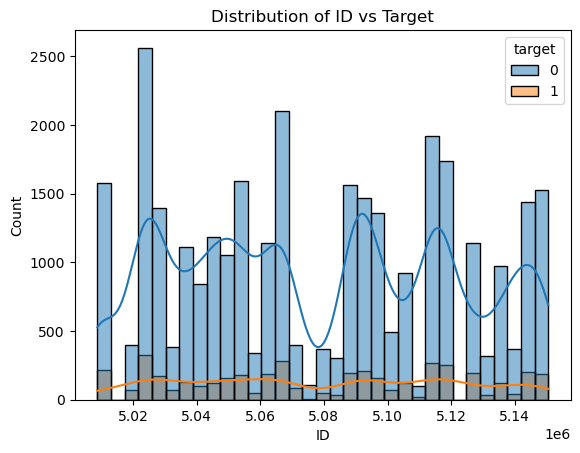

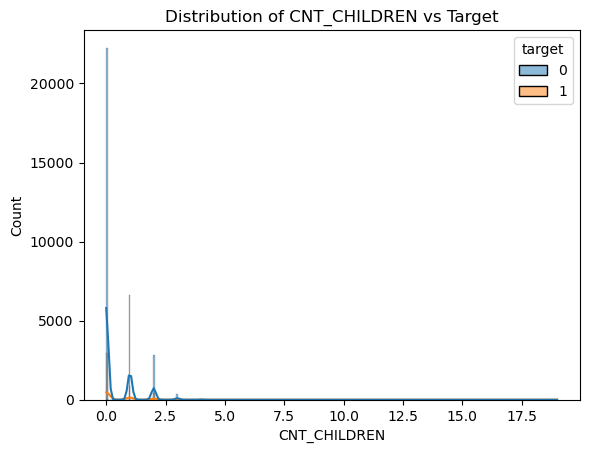

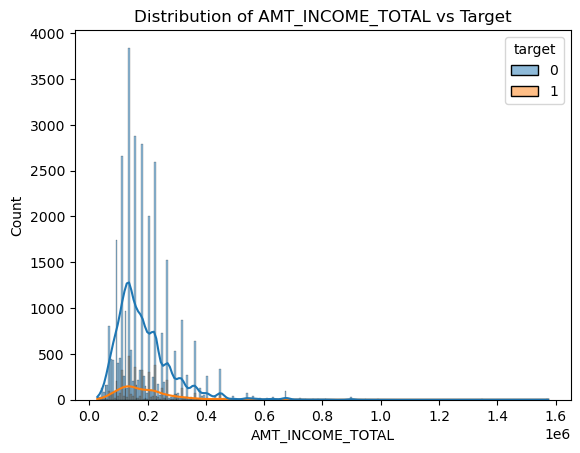

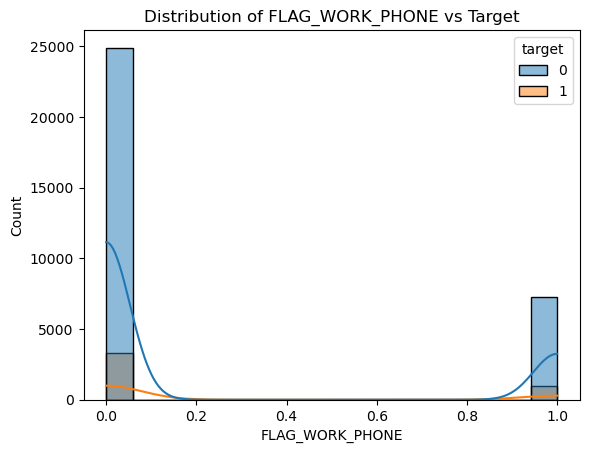

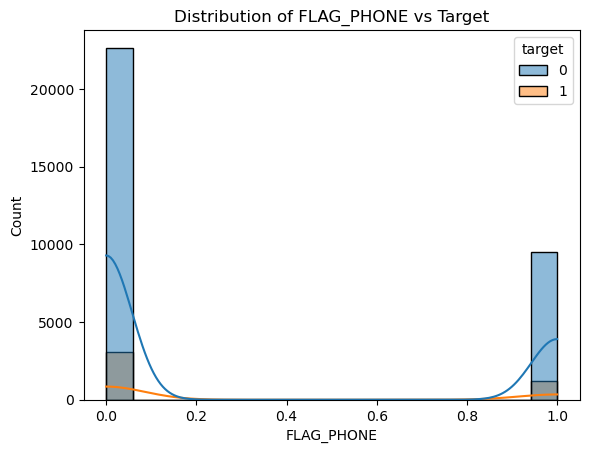

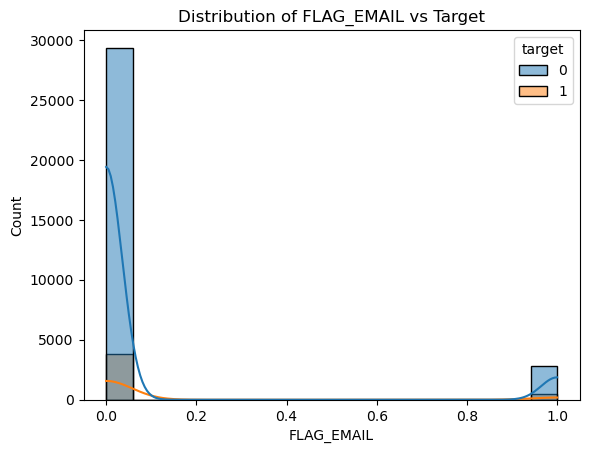

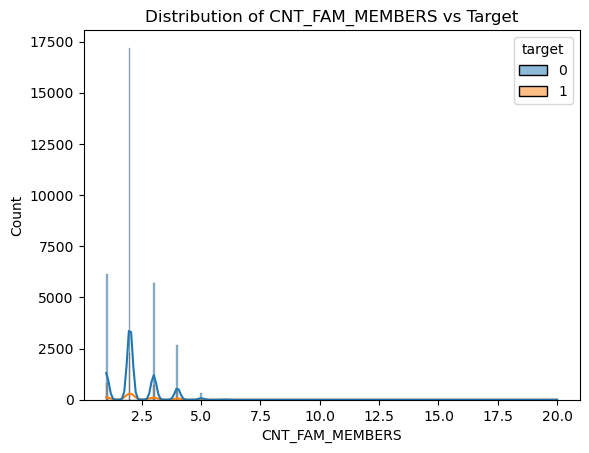

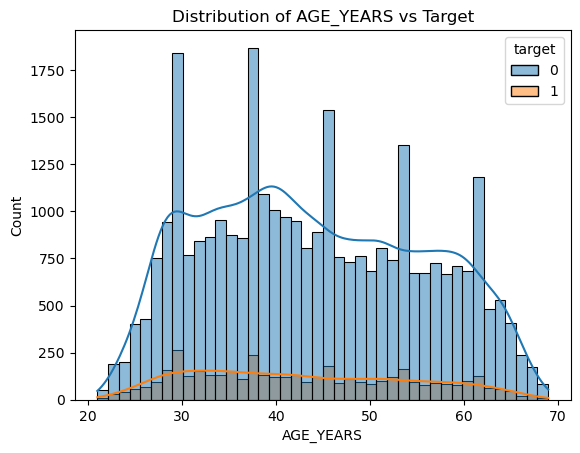

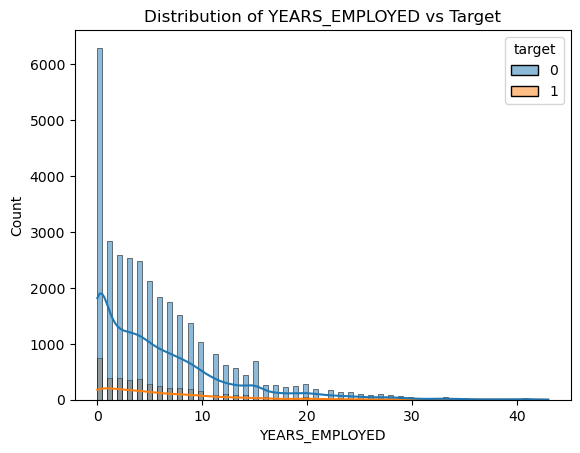

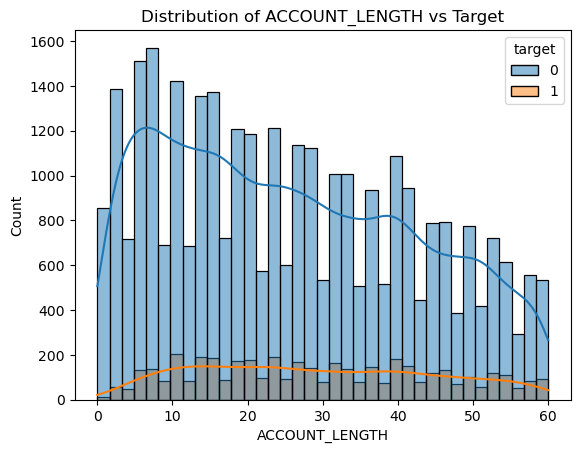

In [64]:
# plotting histograms for seeing the distributions of numerical variables
for col in num_col:
  sns.histplot(data=df, x = col, hue = 'target',kde=True)
  plt.title(f'Distribution of {col} vs Target')
  plt.show()
  print("\n")

target
0    32166
1     4291
Name: count, dtype: int64

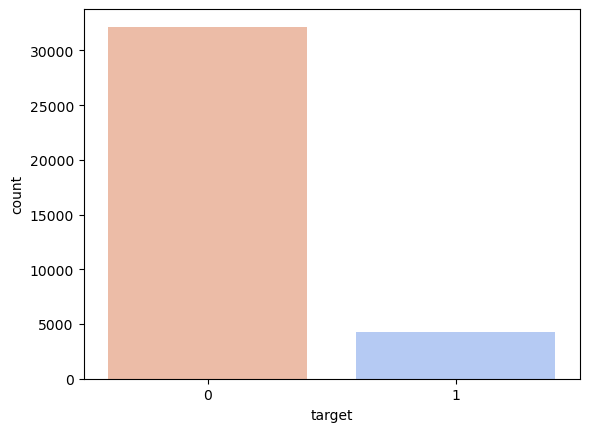

In [65]:
sns.countplot(x='target', data=df, palette='coolwarm_r')
df['target'].value_counts()

In [66]:
df.drop(columns=['ID', 'CNT_CHILDREN'], inplace=True)

The dataset was imported from a CSV file, containing records of customers with attributes such as age, income, employment details, and credit information. Initial preprocessing involved cleaning missing values, particularly in the 'Occupation Type' field, which had a significant number of missing entries. Duplicates were checked and no duplicates were found, ensuring data integrity. Categorical variables were encoded to facilitate analysis, and data types were adjusted for computational efficiency.

I have decided to drop ID and CNT_CHILDREN columns as they seem redundant for our model having a biased distribution.

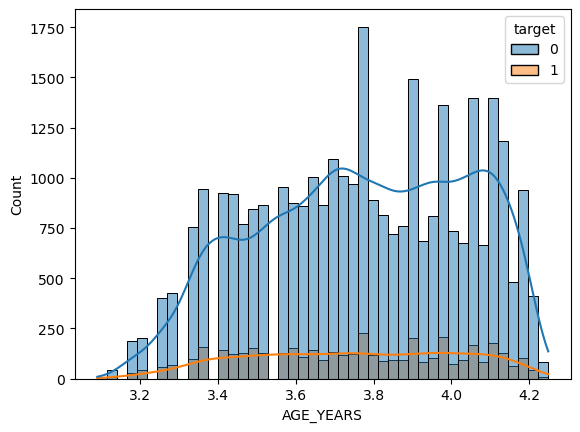

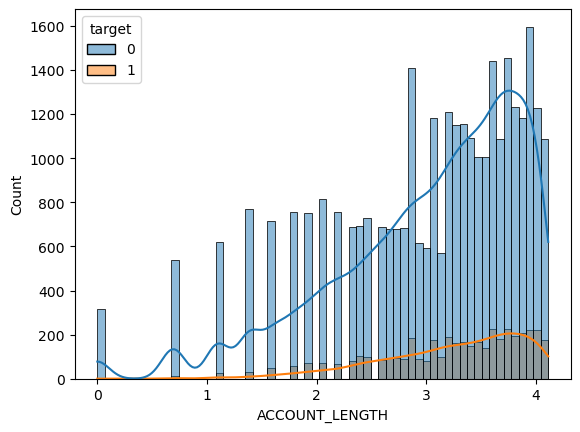

In [67]:
# create a list of columns for applying log transformations
log_list = ['AGE_YEARS','ACCOUNT_LENGTH']

# applying log transformation to the desired columns
for col in log_list:
  df[col] = np.log1p(df[col])

# plotting a histogram to verify the distribution
for col in log_list:
  sns.histplot(data=df,x=col,hue='target',kde=True)
  plt.show()

After applying the log transformation we can see that the distributions of age and final-weight are much more even and closer to normal than before.

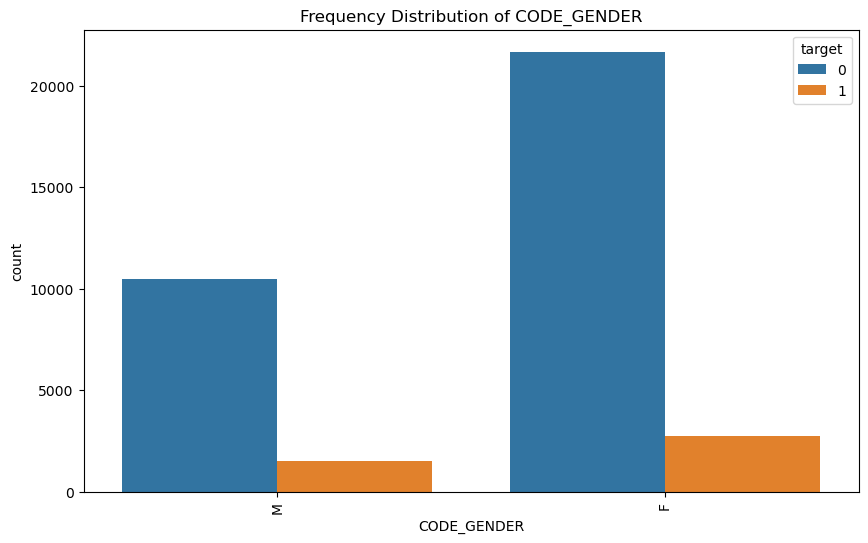

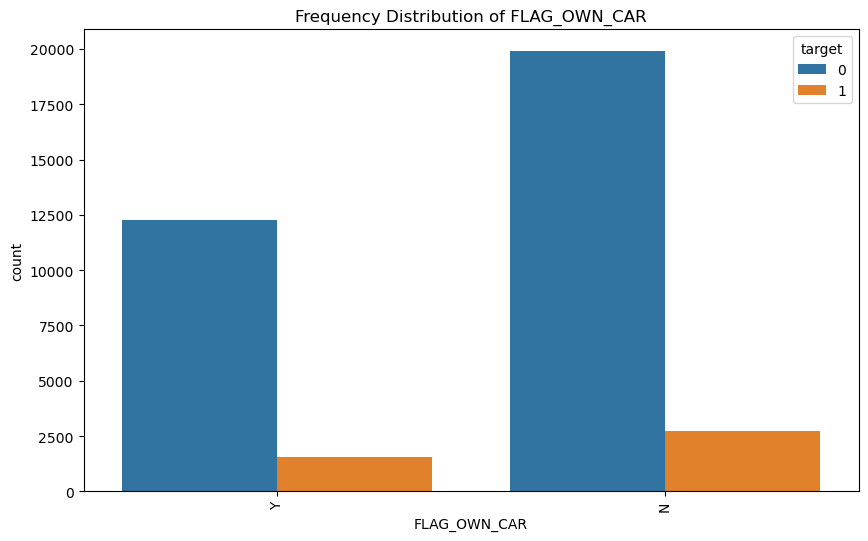

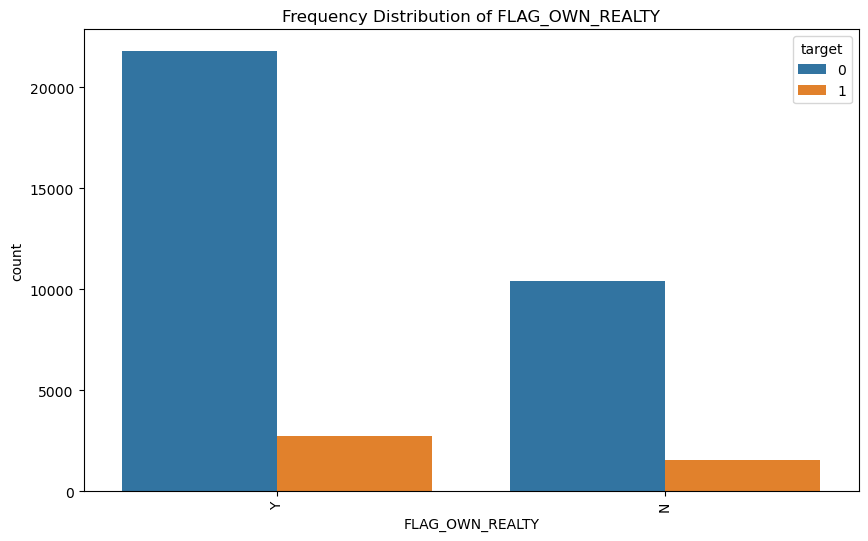

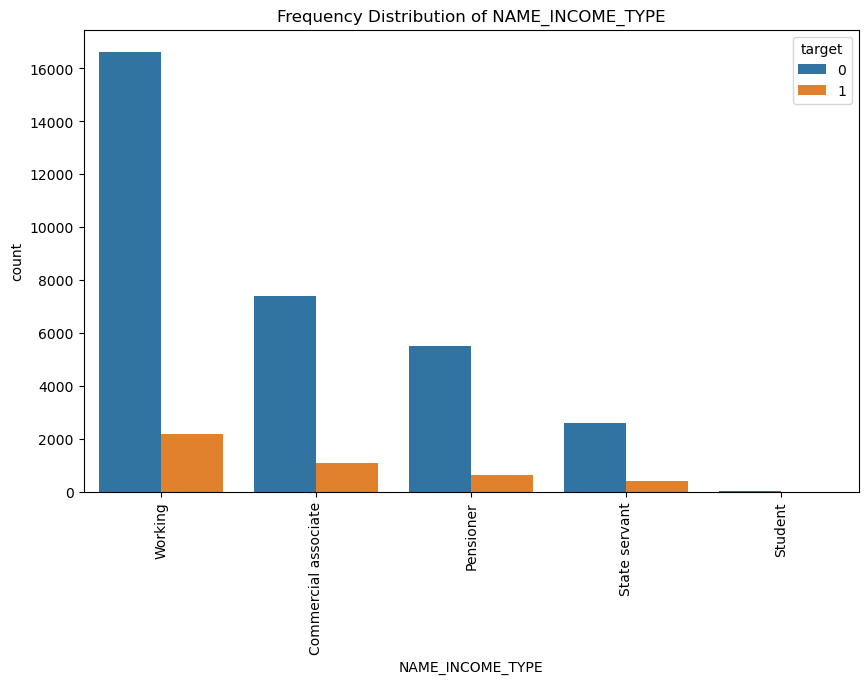

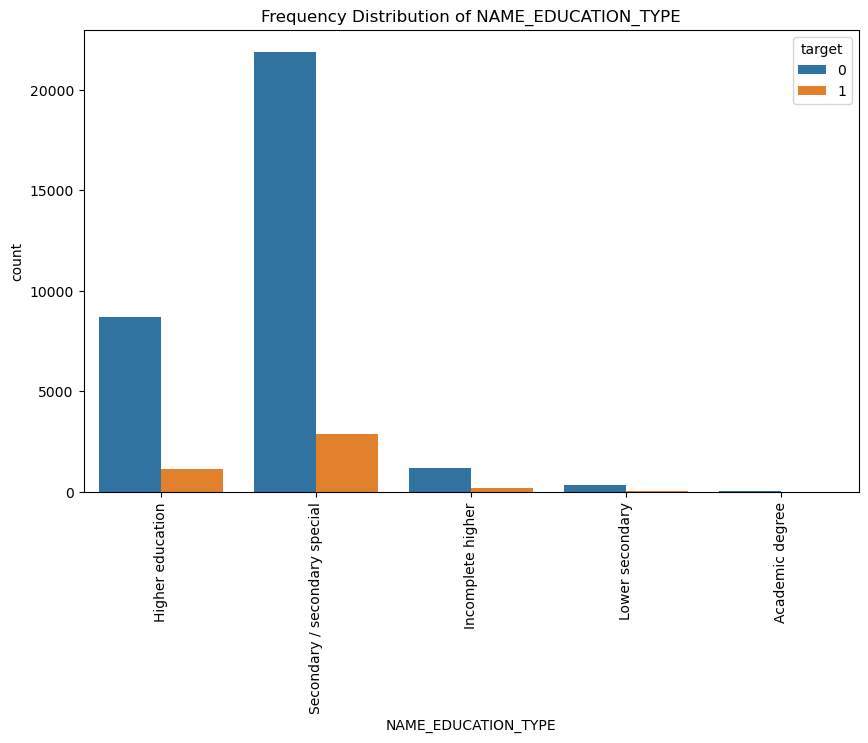

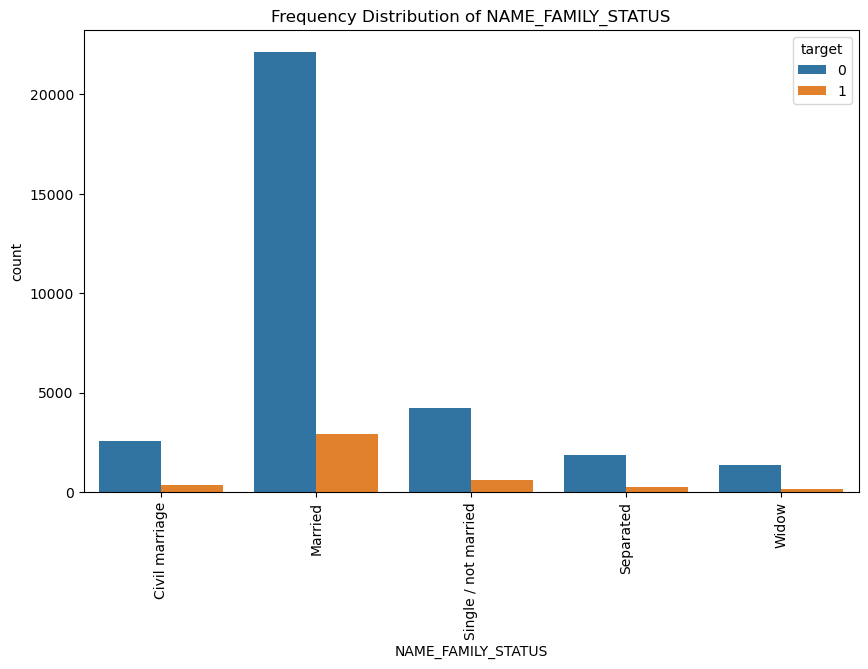

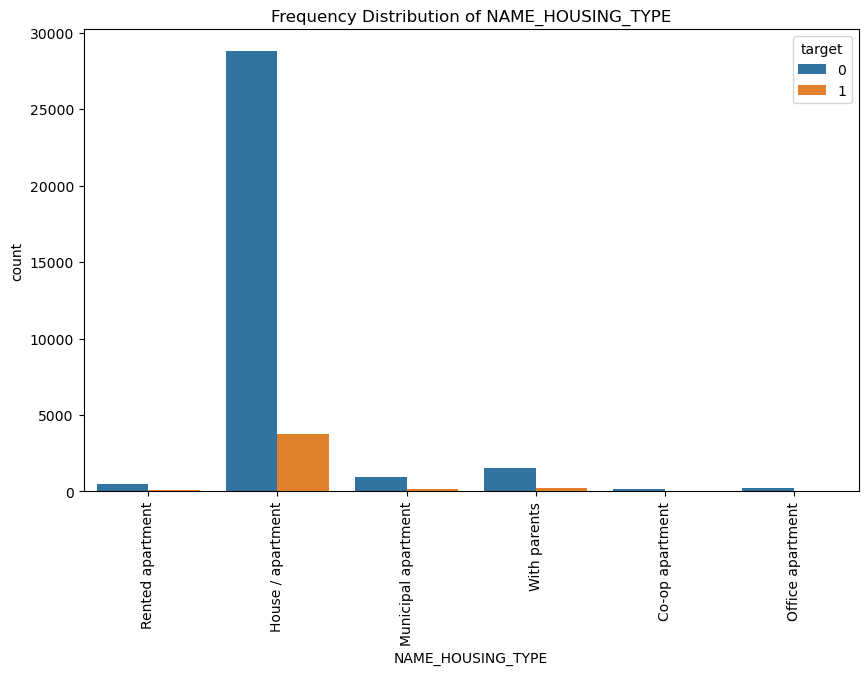

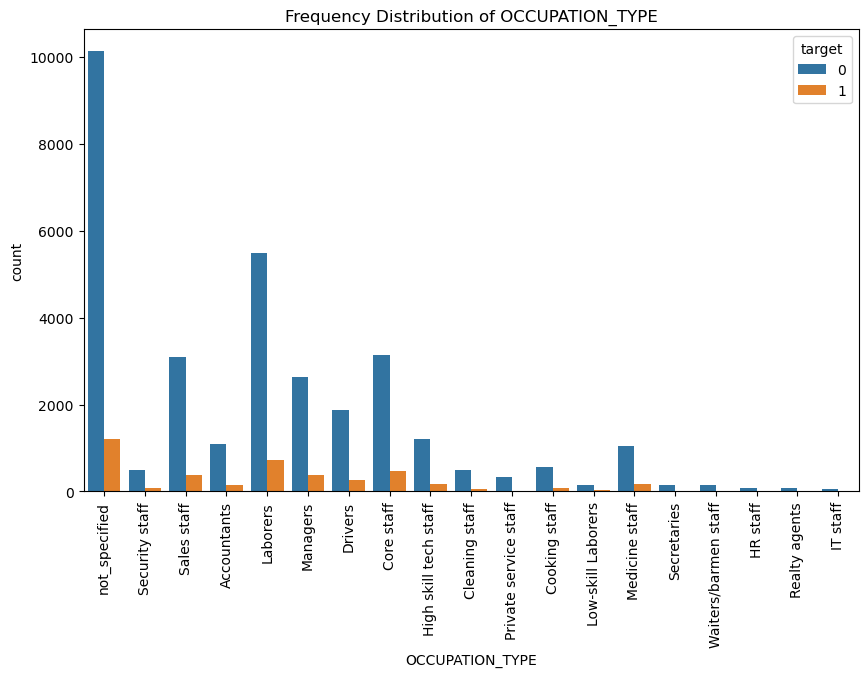

In [68]:
#Analyzing Categorical Features

# plotting frequency distribution for categorical variables

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

for col in categorical_cols:
  plt.figure(figsize=(10,6))
  sns.countplot(data=df,x=col,hue='target')
  plt.title(f'Frequency Distribution of {col}')
  plt.xticks(rotation=90)
  plt.show()
  print("\n")

Feature Engineering

C:\Users\Megmi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


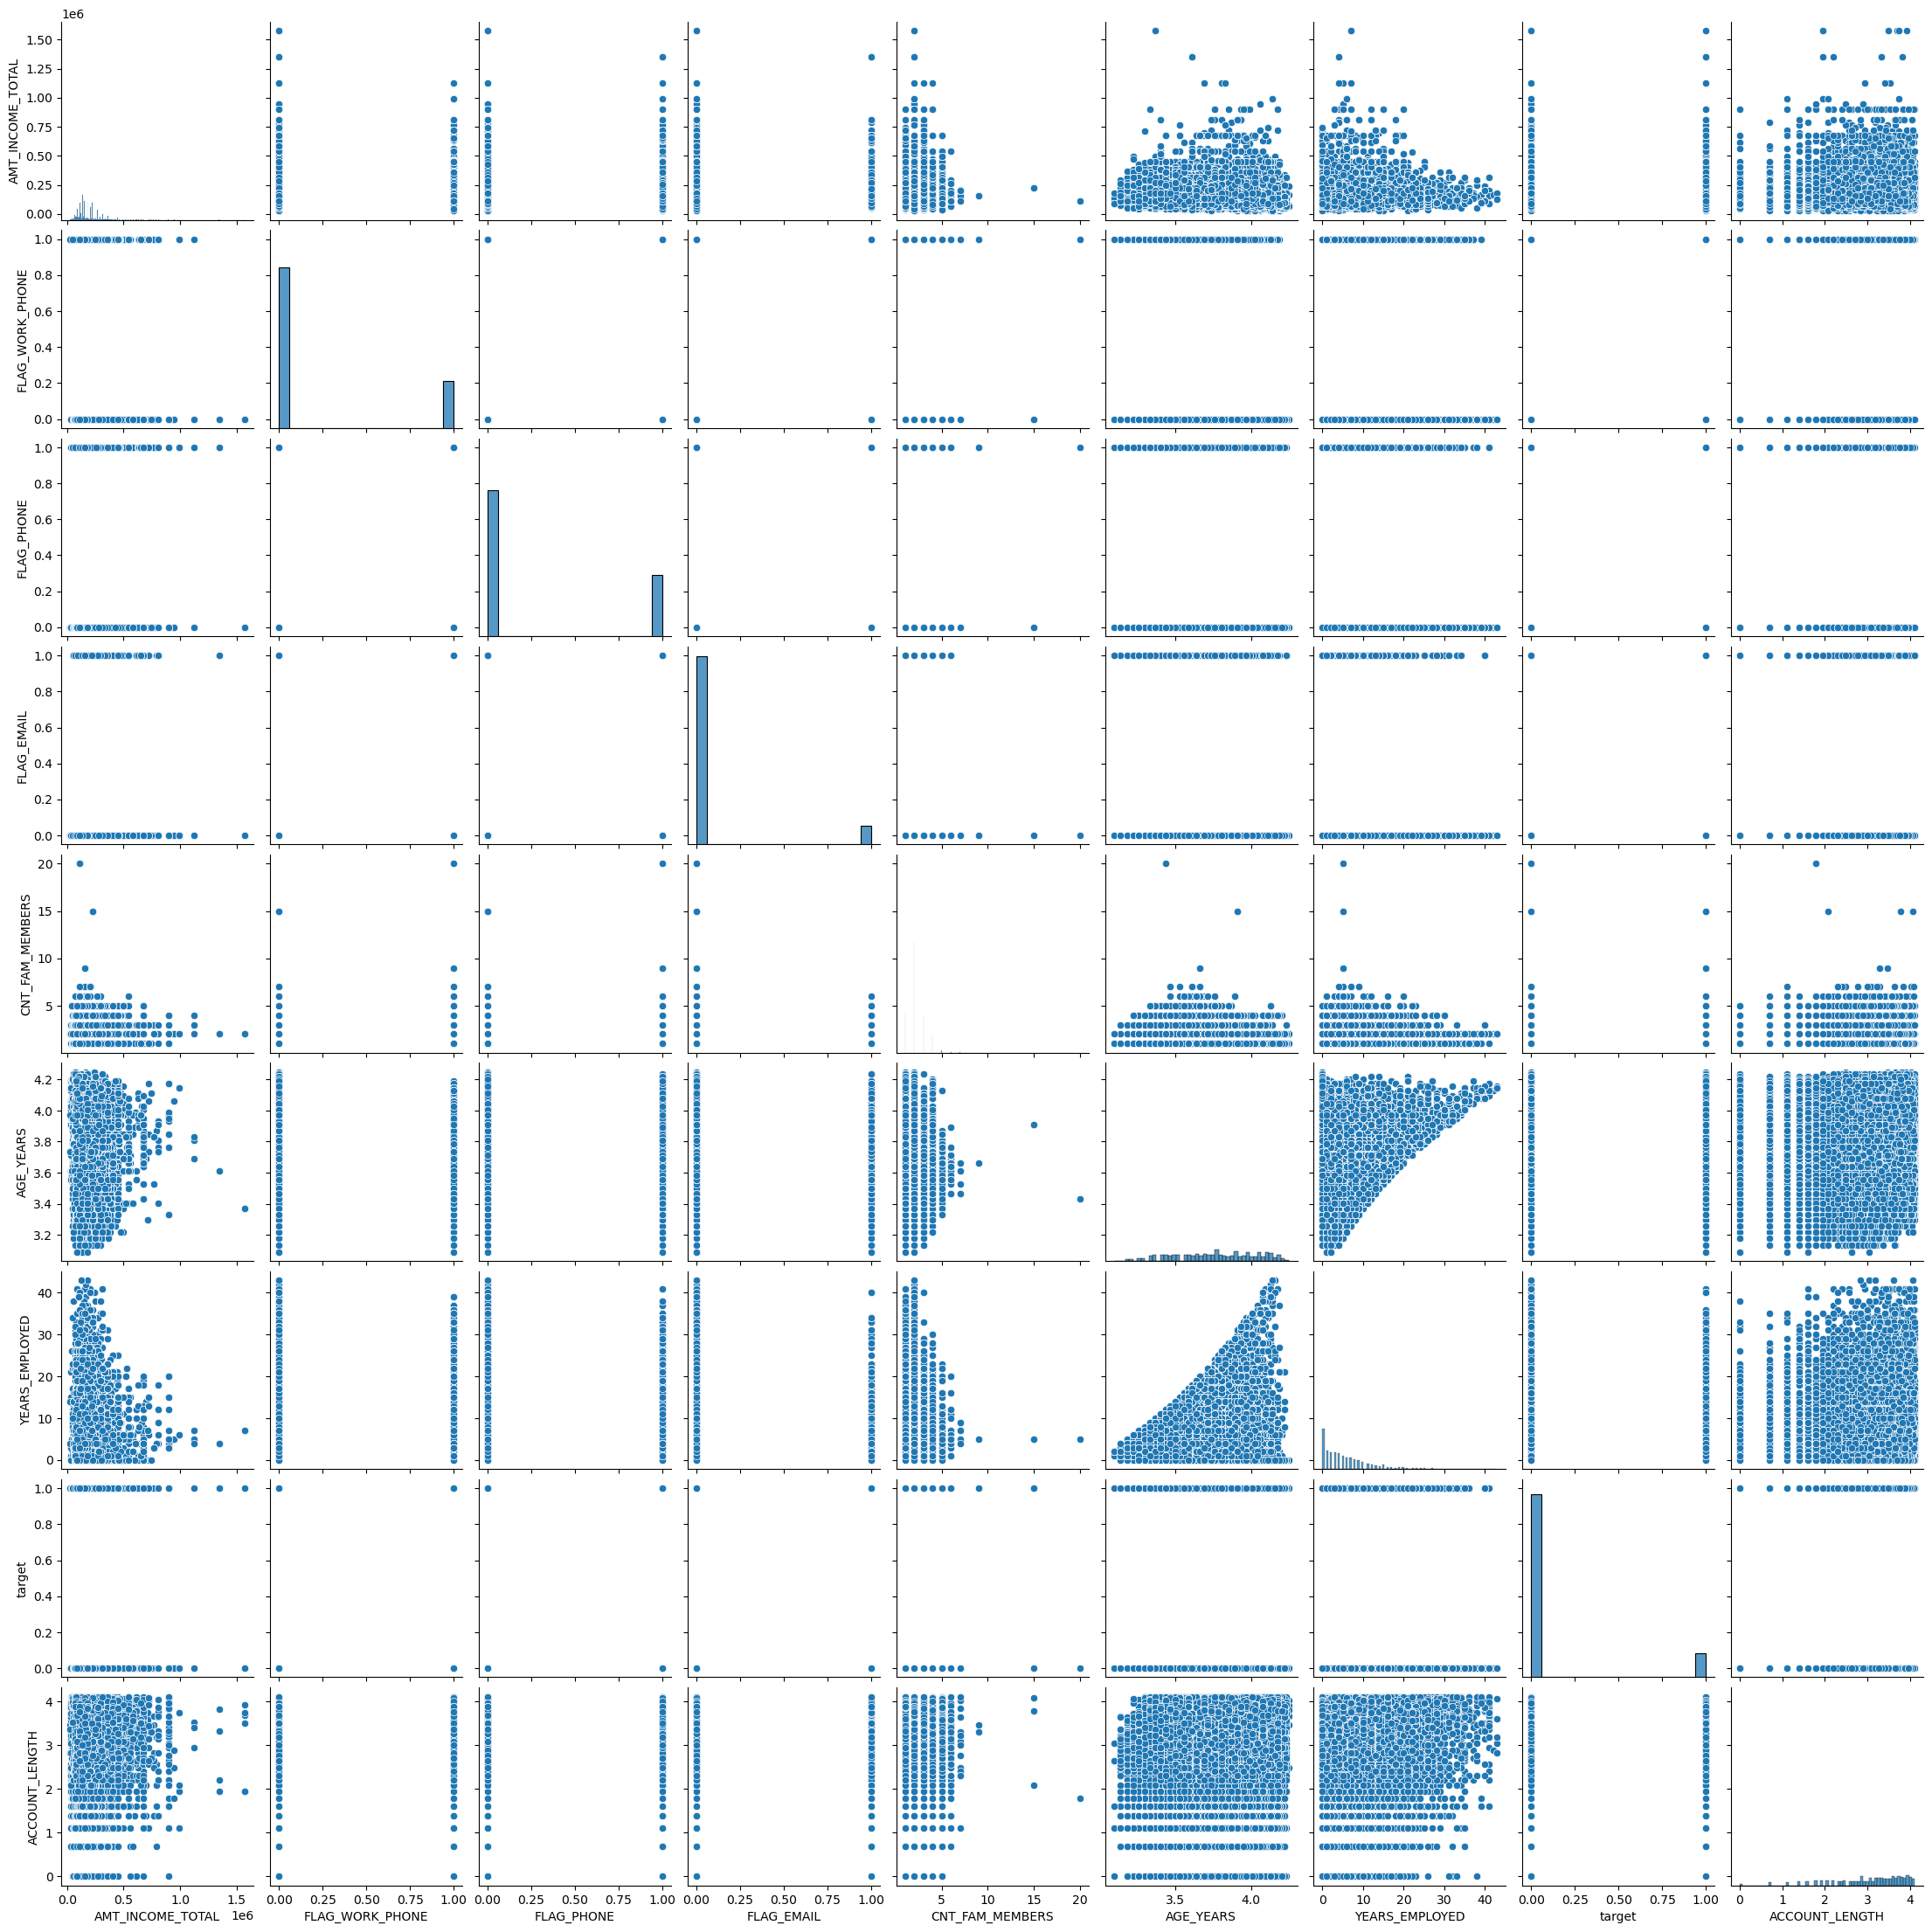

In [69]:
plt = sns.pairplot(data=df)

One Hot Encoding

In [70]:
columns_to_scale = ['AMT_INCOME_TOTAL', 'AGE_YEARS','YEARS_EMPLOYED', 'CNT_FAM_MEMBERS']

In [71]:
dummy = df.copy()

In [72]:
st=StandardScaler()
df[columns_to_scale] = st.fit_transform(df[columns_to_scale])

In [73]:
columns_to_encode = ['CODE_GENDER','FLAG_OWN_CAR','NAME_EDUCATION_TYPE', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE']
df=pd.get_dummies(df,columns=columns_to_encode,dtype='int')

In [74]:
df

,AMT_INCOME_TOTAL,CNT_FAM_MEMBERS,AGE_YEARS,YEARS_EMPLOYED,target,ACCOUNT_LENGTH,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,...,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,OCCUPATION_TYPE_not_specified
0,2.365845,-0.217680,-0.908134,0.919119,1,2.772589,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
1,2.365845,-0.217680,-0.908134,0.919119,1,2.708050,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
2,-0.728827,-0.217680,1.237411,-0.468064,0,3.401197,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
3,0.818509,-1.314564,0.768805,0.302593,0,1.609438,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0.818509,-1.314564,0.768805,0.302593,0,3.295837,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,1.260605,-0.217680,0.394492,0.148462,1,2.484907,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0
36453,-0.286731,-0.217680,-0.798634,-0.313932,1,3.178054,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
36454,-0.286731,-0.217680,-0.798634,-0.313932,1,3.496508,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
36455,0.951138,-0.217680,0.548696,-0.622195,1,2.302585,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [75]:
df.describe()

,AMT_INCOME_TOTAL,CNT_FAM_MEMBERS,AGE_YEARS,YEARS_EMPLOYED,target,ACCOUNT_LENGTH,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,...,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,OCCUPATION_TYPE_not_specified
count,3.645700e+04,3.645700e+04,3.645700e+04,3.645700e+04,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,...,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000
mean,1.559191e-18,2.424542e-16,3.168276e-15,-7.717994e-17,0.117700,3.031873,0.670105,0.329895,0.620292,0.379708,...,0.004800,0.082618,0.033107,0.009436,0.002167,0.095592,0.004142,0.016238,0.004773,0.310585
std,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,0.322257,0.846592,0.470181,0.470181,0.485321,0.485321,...,0.069118,0.275308,0.178920,0.096680,0.046501,0.294035,0.064225,0.126392,0.068921,0.462740
min,-1.568810e+00,-1.314564e+00,-2.552536e+00,-9.304580e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.404080e-01,-2.176798e-01,-7.986341e-01,-7.763266e-01,0.000000,2.564949,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.867311e-01,-2.176798e-01,6.580885e-02,-3.139323e-01,0.000000,3.218876,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.764130e-01,8.792039e-01,8.394143e-01,4.567249e-01,0.000000,3.688879,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.363930e+01,1.952623e+01,1.819711e+00,5.697194e+00,1.000000,4.110874,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Summary statistics revealed key insights, such as the average income level, age distribution, and employment tenure among the customers. Visualizations like histograms and scatter plots provided a deeper understanding of the distribution of key variables. For instance, the income distribution was right-skewed, indicating a smaller number of high-income customers. Box plots highlighted outliers in variables like age and employment years, suggesting the presence of exceptionally old or long-tenured individuals. A correlation analysis was conducted to explore relationships between variables. The findings indicated a weak correlation between age and income levels, suggesting that higher income is not necessarily associated with older age in this dataset. However, a moderate positive correlation was observed between employment tenure and credit amount, implying that longer-employed individuals tend to have higher credit amounts.